In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input, Flatten, Activation, PReLU
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam
from tensorflow.keras.activations import linear, relu
from tensorflow.keras.metrics import MeanSquaredLogarithmicError, MeanAbsolutePercentageError, RootMeanSquaredError

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import sqrt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/train.csv')

In [3]:
df.head(10)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0
5,4,88.944468,57.795044,66.361592,36.098926,1.181795,1.225203,122.90607,20.687458,51.968828,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.433013,0.410326,23.0
6,4,88.944468,57.682296,66.361592,36.069470,1.181795,1.316857,122.90607,10.765639,51.968828,...,2.142857,2.213364,2.119268,1.368922,1.194453,1,0.857143,0.433013,0.349927,11.0
7,4,76.517718,57.175142,59.310096,35.891368,1.197273,0.943560,122.90607,36.451199,44.289459,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,33.0
8,4,76.517718,56.808817,59.310096,35.773432,1.197273,0.981880,122.90607,34.833160,44.289459,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,36.0
9,4,76.517718,56.442492,59.310096,35.655884,1.197273,1.016495,122.90607,33.215121,44.289459,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,31.0


In [4]:
df['critical_temp'].min()

0.00021

In [5]:
df['critical_temp'].max()

185.0

In [6]:
df['critical_temp'].apply(lambda x: np.log10(x)).min()

-3.677780705266081

In [7]:
df['critical_temp'].apply(lambda x: np.log10(x)).max()

2.2671717284030137

In [8]:
df.columns

Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [10]:
df.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [12]:
X = df.iloc[:,df.columns != 'critical_temp'].values
y = df.iloc[:,df.columns == 'critical_temp'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15)
del X, y

In [13]:
X_train.shape

(16265, 81)

In [14]:
hidden_activation = 'relu'
output_activation = None
model = Sequential(name='linear_model')
model.add(Input(shape=(81,), name='input_layer'))
model.add(Dense(81, activation=hidden_activation, name='first_hidden_layer'))
model.add(Dense(162, activation=hidden_activation, name='second_hidden_layer'))
model.add(Dropout(0.2))
model.add(Dense(81, activation=hidden_activation, name='third_hidden_layer'))
model.add(Dropout(0.1))
model.add(Dense(40, activation=hidden_activation, name='fourth_hidden_layer'))
model.add(Dense(1, name='output_layer'))
model.compile(loss='mse', optimizer=RMSprop(learning_rate=1e-3), metrics=['msle', 'mae', 'mape', RootMeanSquaredError(name='rmse')])
model.summary()

Model: "linear_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden_layer (Dense)   (None, 81)                6642      
_________________________________________________________________
second_hidden_layer (Dense)  (None, 162)               13284     
_________________________________________________________________
dropout (Dropout)            (None, 162)               0         
_________________________________________________________________
third_hidden_layer (Dense)   (None, 81)                13203     
_________________________________________________________________
dropout_1 (Dropout)          (None, 81)                0         
_________________________________________________________________
fourth_hidden_layer (Dense)  (None, 40)                3280      
_________________________________________________________________
output_layer (Dense)         (None, 1)                

In [15]:
%%time
rmse_loss = []
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)
rmse_loss += history.history['rmse']

Epoch 1/100
509/509 [==============================] - 3s 6ms/step - loss: 6976.8257 - msle: 2.5376 - mae: 40.9991 - mape: 10016.1562 - rmse: 83.5274 - val_loss: 466.9200 - val_msle: 0.8000 - val_mae: 16.1638 - val_mape: 414.3404 - val_rmse: 21.6083
Epoch 2/100
509/509 [==============================] - 2s 3ms/step - loss: 534.8356 - msle: 0.8490 - mae: 16.6125 - mape: 1621.3136 - rmse: 23.1265 - val_loss: 446.1453 - val_msle: 0.6310 - val_mae: 14.7341 - val_mape: 541.8490 - val_rmse: 21.1222
Epoch 3/100
509/509 [==============================] - 2s 4ms/step - loss: 436.1039 - msle: 0.6695 - mae: 14.6030 - mape: 1732.2390 - rmse: 20.8831 - val_loss: 479.5086 - val_msle: 0.5046 - val_mae: 14.8978 - val_mape: 370.7248 - val_rmse: 21.8977
Epoch 4/100
509/509 [==============================] - 3s 5ms/step - loss: 395.2169 - msle: 0.5746 - mae: 13.6850 - mape: 1457.7228 - rmse: 19.8801 - val_loss: 339.9217 - val_msle: 0.5401 - val_mae: 12.8473 - val_mape: 325.3253 - val_rmse: 18.4370
Epoch 

Epoch 34/100
509/509 [==============================] - 2s 4ms/step - loss: 264.8836 - msle: 0.3741 - mae: 10.7876 - mape: 1069.8356 - rmse: 16.2752 - val_loss: 267.6298 - val_msle: 0.3868 - val_mae: 11.2957 - val_mape: 324.2413 - val_rmse: 16.3594
Epoch 35/100
509/509 [==============================] - 3s 5ms/step - loss: 267.9315 - msle: 0.3735 - mae: 10.8275 - mape: 969.8117 - rmse: 16.3686 - val_loss: 284.1346 - val_msle: 0.3687 - val_mae: 11.7226 - val_mape: 289.1176 - val_rmse: 16.8563
Epoch 36/100
509/509 [==============================] - 2s 4ms/step - loss: 264.1434 - msle: 0.3721 - mae: 10.7517 - mape: 965.8417 - rmse: 16.2525 - val_loss: 610.4911 - val_msle: 0.4771 - val_mae: 16.1269 - val_mape: 264.2707 - val_rmse: 24.7081
Epoch 37/100
509/509 [==============================] - 3s 5ms/step - loss: 267.2259 - msle: 0.3684 - mae: 10.8042 - mape: 1005.7065 - rmse: 16.3470 - val_loss: 266.4095 - val_msle: 0.4010 - val_mae: 11.1810 - val_mape: 332.9388 - val_rmse: 16.3221
Epoch 

Epoch 67/100
509/509 [==============================] - 2s 4ms/step - loss: 250.5587 - msle: 0.3624 - mae: 10.4302 - mape: 1101.2600 - rmse: 15.8290 - val_loss: 318.5468 - val_msle: 0.3530 - val_mae: 12.2201 - val_mape: 292.6193 - val_rmse: 17.8479
Epoch 68/100
509/509 [==============================] - 2s 5ms/step - loss: 252.0531 - msle: 0.3589 - mae: 10.4389 - mape: 1069.3148 - rmse: 15.8762 - val_loss: 399.8172 - val_msle: 0.3764 - val_mae: 13.6522 - val_mape: 276.9178 - val_rmse: 19.9954
Epoch 69/100
509/509 [==============================] - 2s 4ms/step - loss: 251.9237 - msle: 0.3532 - mae: 10.4042 - mape: 1057.3114 - rmse: 15.8721 - val_loss: 538.0956 - val_msle: 0.4330 - val_mae: 15.6645 - val_mape: 278.2735 - val_rmse: 23.1969
Epoch 70/100
509/509 [==============================] - 3s 5ms/step - loss: 250.9852 - msle: 0.3559 - mae: 10.4298 - mape: 1130.9565 - rmse: 15.8425 - val_loss: 270.4688 - val_msle: 0.3705 - val_mae: 11.2254 - val_mape: 314.3559 - val_rmse: 16.4459
Epoc

Epoch 100/100
509/509 [==============================] - 2s 5ms/step - loss: 235.7931 - msle: 0.3385 - mae: 10.0620 - mape: 998.1314 - rmse: 15.3556 - val_loss: 328.8951 - val_msle: 0.3393 - val_mae: 12.2741 - val_mape: 247.7755 - val_rmse: 18.1355
Wall time: 3min 29s


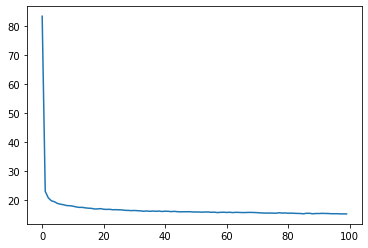

In [16]:
plt.plot(rmse_loss)

In [17]:
sqrt(mean_squared_error(y_test, model.predict(X_test)))

18.495854364587164